# Генерация слов с ошибками и анализ распознавания

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from random import randint, choices, choice
from functions import make_a_mistake_in_word, num2text, damerau_levenshtein_distance

## Собираем датасет слов и преобразуем слова в слова с ошибками

In [3]:
words = []
for i in range(1000):
    words += num2text(randint(0, 999)).split()
df = pd.DataFrame({'words': np.array(words)})

In [4]:
words_with_mistakes = []
number_of_mistakes = []
for index, row in df.iterrows():
    s, k = make_a_mistake_in_word(row['words'], number_mistakes=randint(1,2))
    words_with_mistakes += [s]
    number_of_mistakes += [k]
df['words_with_mistakes'] = np.array(words_with_mistakes)
df['number_of_mistakes'] = np.array(number_of_mistakes)
df

words words_with_mistakes  number_of_mistakes
0        триста              треста                   1
1      двадцать             двадцат                   1
2          один                адин                   1
3        двести               двсти                   1
4         сорок                сарк                   2
...         ...                 ...                 ...
2732  девяноста            девяосто                   2
2733      шесть                шист                   2
2734     триста                тста                   2
2735   тридцать             тридцот                   2
2736       пять                 пяь                   1

[2737 rows x 3 columns]

## Делаем распознавание слов

In [5]:
words_without_mistakes = []
for index, row in df.iterrows():
    s = ''
    min_score = 100
    for i in set(list(df['words'])):
        if damerau_levenshtein_distance(i, row['words_with_mistakes']) < min_score:
            a = i
            min_score = damerau_levenshtein_distance(i, row['words_with_mistakes'])
    words_without_mistakes += [a]
df['words_without_mistakes'] = np.array(words_without_mistakes)

## Оцениваем качество распознавания

In [6]:
f1_score(df['words'], df['words_without_mistakes'], average='micro')
## получили процент распознавания равный 97. Этот процент также зависит от количества ошибок в словах. 
## Если мы поставим максимальное количество ошибок 3 - процент распознавания упадет до 87-90 %
## При максимальом количестве ошибок 1 процент распознавания увеличится

0.9671172816952868

In [7]:
df['result'] = np.array([row['words'] == row['words_without_mistakes'] for index, row in df.iterrows()])
df

words words_with_mistakes  number_of_mistakes  \
0        триста              треста                   1   
1      двадцать             двадцат                   1   
2          один                адин                   1   
3        двести               двсти                   1   
4         сорок                сарк                   2   
...         ...                 ...                 ...   
2732  девяноста            девяосто                   2   
2733      шесть                шист                   2   
2734     триста                тста                   2   
2735   тридцать             тридцот                   2   
2736       пять                 пяь                   1   

     words_without_mistakes  result  
0                    триста    True  
1                  двадцать    True  
2                      один    True  
3                    двести    True  
4                     сорок    True  
...                     ...     ...  
2732              девяноста    True  
2733                  шесть    True  
2734                 триста    True  
2735               тридцать    True  
2736                   пять    True  

[2737 rows x 5 columns]

<AxesSubplot:>

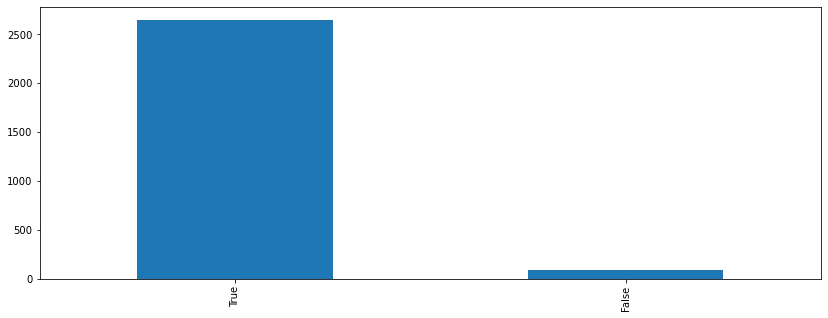

In [8]:
fig = plt.figure(figsize= (14,5))
df['result'].value_counts().plot.bar()